In [13]:
#Libraries imports

import pandas as pd

import camelot

import requests

from bs4 import BeautifulSoup

import folium

import json

import sys


import geojson

import datapackage 

import datetime

import numpy as np


import bar_chart_race as bcr




IndentationError: unexpected indent (generic.py, line 5214)

In [ ]:
# Request actual top 200 ATP male players en espn site
page = requests.get("https://www.espn.com/tennis/rankings")

In [ ]:
# Scrapping data using BeautifulSoup library
soup = BeautifulSoup(page.content, 'html.parser')

# Look for the table of interest
print('Classes of each table:')
for table in soup.find_all('table'):
    print(table.get('class'))


Classes of each table:
['Table', 'Table--align-right']


In [ ]:
# Extract data from the table
tab = soup.find("table",{"class":"Table--align-right"})

# Isolate names of the countries corresponding to the flag
nations = soup.find_all(class_ = "Image Logo Logo__sm",attrs ={'title'})

In [ ]:
# Creating the dataframe
df = pd.DataFrame(columns=['Rankings','Player', 'Country', 'Age'])

# and extract corresponding data
for row in tab.tbody.find_all('tr'):    
    # Find all data for each column   
    # Find all data for each column
    columns = row.find_all('td')
    
    if(columns != []):
        rankings = columns[0].text.strip()
        player = columns[2].text.strip('&0.')
        country = columns[2].find('Image Logo Logo__sm')
        age = columns[4].text.strip('&0.')
        

        df = df.append({'Rankings': rankings,  'Player': player, 'Age': age,'Country': country}, ignore_index=True)

In [ ]:
# Assign nationality to player based on the flag
for i in range(150):
    df['Country'][i] = nations[i]['title']

df.reset_index(drop=True,inplace=True)

In [ ]:
# Count number of top 200 players by country
bestcountries = df.groupby('Country').count()['Age']
bestcountries = pd.DataFrame(bestcountries)
bestcountries['index'] = bestcountries.index
bestcountries = bestcountries.drop('index',axis = 1)
bestcountries["Name"] = bestcountries.index

In [ ]:
# Setting up the world countries data URL
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

In [ ]:
country_geo = 'world-countries.json'
wc = 'countries.geojson'

# Extracting A3 and A2 country names
codes = pd.read_excel('codes.xlsx')

In [ ]:
bestcountries = bestcountries[['Name', 'Age']]
country = pd.read_csv('data_cod.csv')
country = country.merge(bestcountries,how='left', left_on='Name', right_on='Name')
country.fillna(0,inplace = True)


In [ ]:
bestcountries.head()

,Name,Age
Country,,
Argentina,Argentina,12
Australia,Australia,10
Belarus,Belarus,2
Belgium,Belgium,2
Bolivia,Bolivia,1


In [ ]:
results = codes.merge(country,right_on='Code',left_on='Code-2' )
results = results[['Country','Age']]
results[['Age']] = results[['Age']].astype(int)


In [ ]:
m = folium.Map(location=[45.5236, -122.6750])

folium.Choropleth(
    geo_data=country_shapes,
    name='choropleth',
    data=results,
    columns=["Country", "Age"],
    key_on='feature.properties.name',
    fill_color="YlGn",
    nan_fill_color='white',
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Top 200 Players repartition",
).add_to(m)

folium.LayerControl().add_to(m)

m

In [ ]:
atp = pd.read_csv('Data.csv/Data.csv',encoding='latin-1')
atp2 = pd.read_csv('Data.csv/ATP2.csv',encoding='latin-1')

atp2.columns




c:\Users\theoi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['best_of', 'draw_size', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms',
       'l_ace', 'l_bpFaced', 'l_bpSaved', 'l_df', 'l_svpt', 'loser_age',
       'loser_entry', 'loser_hand', 'loser_ht', 'loser_id', 'loser_ioc',
       'loser_name', 'loser_rank', 'loser_rank_points', 'loser_seed',
       'match_num', 'minutes', 'round', 'score', 'surface', 'tourney_date',
       'tourney_id', 'tourney_level', 'tourney_name', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_ace', 'w_bpFaced', 'w_bpSaved', 'w_df',
       'w_svpt', 'winner_age', 'winner_entry', 'winner_hand', 'winner_ht',
       'winner_id', 'winner_ioc', 'winner_name', 'winner_rank',
       'winner_rank_points', 'winner_seed'],
      dtype='object')

In [ ]:
atp2 = atp2[['loser_name','winner_name','loser_age','winner_age','tourney_date','round','winner_rank','loser_rank','winner_rank_points','loser_rank_points']]
atp2 = atp2[atp2.tourney_date >= 20000103]



In [ ]:
atp2['Lage'] = atp2['loser_age'].apply(np.floor)
atp2['Wage'] = atp2['winner_age'].apply(np.floor)

atp2['Winner'] = atp2['winner_name'].str.split().str[-1]
atp2['Loser'] = atp2['loser_name'].str.split().str[-1]
atp2['Date'] = atp2['tourney_date']

atp2.drop(labels =['winner_name','loser_name','tourney_date','loser_age','winner_age'], axis = 1,inplace = True)


In [ ]:
final = atp2.loc[atp2['round']== 'F']
top_win = final['Winner'].value_counts()[:10].index.tolist()
final = final[final['Winner'].isin(top_win)]

In [ ]:
final['count'] = final.groupby(['Winner']).cumcount().add(1)

In [ ]:
final.head(10)

,round,winner_rank,loser_rank,winner_rank_points,loser_rank_points,Lage,Wage,Winner,Loser,Date,count
110290,F,25.0,4.0,955.0,1850.0,25.0,18.0,Hewitt,Enqvist,20000103,1
110414,F,21.0,94.0,1232.0,419.0,29.0,18.0,Hewitt,Stoltenberg,20000110,2
111023,F,18.0,11.0,1280.0,1547.0,25.0,19.0,Hewitt,Henman,20000306,3
111991,F,11.0,4.0,1826.0,3106.0,28.0,19.0,Hewitt,Sampras,20000612,4
113782,F,7.0,4.0,2560.0,3110.0,24.0,19.0,Hewitt,Norman,20010108,5
113971,F,27.0,67.0,1080.0,609.0,26.0,19.0,Federer,Boutter,20010129,1
114825,F,89.0,78.0,458.0,503.0,20.0,18.0,Roddick,Malisse,20010423,1
114943,F,69.0,81.0,633.0,527.0,25.0,18.0,Roddick,Lee,20010430,2
115397,F,6.0,11.0,2715.0,1950.0,26.0,20.0,Hewitt,Henman,20010611,6
115459,F,6.0,61.0,2715.0,669.0,23.0,20.0,Hewitt,Canas,20010618,7


In [ ]:
final = final[['Winner','Date','count']]

In [ ]:
count_hewitt = final.loc[final['Winner']=='Hewitt'].set_index('Date')
count_federer = final.loc[final['Winner']=='Federer'].set_index('Date')
count_roddick = final.loc[final['Winner']=='Roddick'].set_index('Date')
count_ferrer = final.loc[final['Winner']=='Ferrer'].set_index('Date')
count_davydenko = final.loc[final['Winner']=='Davydenko'].set_index('Date')
count_nadal = final.loc[final['Winner']=='Nadal'].set_index('Date')
count_murray = final.loc[final['Winner']=='Murray'].set_index('Date')
count_djokovic = final.loc[final['Winner']=='Djokovic'].set_index('Date')
count_potro = final.loc[final['Winner']=='Potro'].set_index('Date')
count_cilic = final.loc[final['Winner']=='Cilic'].set_index('Date')



In [ ]:
toppp = pd.DataFrame(columns=top_win,index = final['Date'])
toppp.fillna(0,inplace=True)


In [ ]:
toppp = toppp.combine_first(count_hewitt)
toppp['Hewitt'] = toppp['count']
toppp['count'].values[:] = None

toppp = toppp.combine_first(count_cilic)
toppp['Cilic'] = toppp['count']
toppp['count'].values[:] = None

toppp = toppp.combine_first(count_davydenko)
toppp['Davydenko'] = toppp['count']
toppp['count'].values[:] = None

toppp = toppp.combine_first(count_ferrer)
toppp['Ferrer'] = toppp['count']
toppp['count'].values[:] = None

toppp = toppp.combine_first(count_djokovic)
toppp['Djokovic'] = toppp['count']
toppp['count'].values[:] = None

toppp = toppp.combine_first(count_nadal)
toppp['Nadal'] = toppp['count']
toppp['count'].values[:] = None

toppp = toppp.combine_first(count_murray)
toppp['Murray'] = toppp['count']
toppp['count'].values[:] = None

toppp = toppp.combine_first(count_federer)
toppp['Federer'] = toppp['count']
toppp['count'].values[:] = None

toppp = toppp.combine_first(count_potro)
toppp['Potro'] = toppp['count']
toppp['count'].values[:] = None

toppp = toppp.combine_first(count_roddick)
toppp['Roddick'] = toppp['count']
toppp['count'].values[:] = None
toppp.fillna(0,inplace = True)


toppp.replace(to_replace=0.0, method='ffill').values

array([[0.0, 0.0, 0.0, ..., 0.0, 'Hewitt', 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 'Hewitt', 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 'Hewitt', 0.0],
       ...,
       [18.0, 21.0, 72.0, ..., 32.0, 'Federer', 0.0],
       [18.0, 21.0, 73.0, ..., 32.0, 'Djokovic', 0.0],
       [18.0, 21.0, 73.0, ..., 32.0, 'Federer', 0.0]], dtype=object)

In [ ]:

toppp = toppp.replace(0.0, method='ffill')

In [ ]:
toppp['nouveau'] = toppp.index
toppp['nouveau'] = pd.to_datetime(toppp['nouveau'] , format='%Y%m%d').dt.strftime('%Y-%m-%d')

toppp = toppp.set_index(['nouveau'])

In [ ]:
toppp = toppp.drop(['count','Winner'],axis = 1)

In [ ]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
toppp.to_csv('out.zip', index=False,
          compression=compression_opts)

In [ ]:
import matplotlib.pyplot as plt
import ffmpeg

In [ ]:
toppp.dtypes

Cilic        float64
Davydenko    float64
Djokovic     float64
Federer      float64
Ferrer       float64
Hewitt       float64
Murray       float64
Nadal        float64
Potro        float64
Roddick      float64
dtype: object

In [ ]:
plt.rcParams['animation.ffmpeg_path'] = r'C:\Users\theoi\anaconda3\Library\bin\ffmpeg.exe'

html = bcr.bar_chart_race(toppp)

c:\Users\theoi\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
c:\Users\theoi\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


In [ ]:
bcr.bar_chart_race(
    df = toppp,
    filename="video.mp4",
    dpi = 144,
    steps_per_period=20,
    period_length = 200
)

NameError: name 'bcr' is not defined

In [ ]:
html

In [ ]:
s = toppp.loc['']

KeyError: ''

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 2.5), dpi=144)
colors = plt.cm.Dark2(range(6))
y = s.index
width = s.values
ax.barh(y=y, width=width, color=colors);

In [ ]:
toppp['Hewitt'] = toppp['count']
toppp['count'] = 'NaN'

In [ ]:
toppp = toppp.combine_first(count_cilic)
toppp['Cilic'] = toppp['count']

,Cilic,Davydenko,Djokovic,Federer,Ferrer,Hewitt,Murray,Nadal,Potro,Roddick,Winner,count
Date,,,,,,,,,,,,
20000103,NaN,0,0,0,0,1.0,0,0,0,0,Hewitt,NaN
20000110,NaN,0,0,0,0,2.0,0,0,0,0,Hewitt,NaN
20000306,NaN,0,0,0,0,3.0,0,0,0,0,Hewitt,NaN
20000612,NaN,0,0,0,0,4.0,0,0,0,0,Hewitt,NaN
20010108,NaN,0,0,0,0,5.0,0,0,0,0,Hewitt,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20180827,NaN,0,0,0,0,NaN,0,0,0,0,NaN,NaN
20181008,NaN,0,0,0,0,NaN,0,0,0,0,NaN,NaN
20181022,NaN,0,0,0,0,NaN,0,0,0,0,NaN,NaN


In [ ]:
toppp.combine_first(count_hewitt)
toppp.combine_first(count_federer)
toppp.combine_first(count_roddick)
toppp.combine_first(count_ferrer)
toppp.combine_first(count_davydenko)
toppp.combine_first(count_nadal)
toppp.combine_first(count_murray)
toppp.combine_first(count_djokovic)
toppp.combine_first(count_potro)
toppp.combine_first(count_cilic)


,Cilic,Davydenko,Djokovic,Federer,Ferrer,Hewitt,Murray,Nadal,Potro,Roddick,Winner,count
Date,,,,,,,,,,,,
20000103,0,0,0,0,0,0,0,0,0,0,NaN,NaN
20000110,0,0,0,0,0,0,0,0,0,0,NaN,NaN
20000306,0,0,0,0,0,0,0,0,0,0,NaN,NaN
20000612,0,0,0,0,0,0,0,0,0,0,NaN,NaN
20010108,0,0,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20180827,0,0,0,0,0,0,0,0,0,0,NaN,NaN
20181008,0,0,0,0,0,0,0,0,0,0,NaN,NaN
20181022,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
atp2 = atp2[['loser_name','winner_name','loser_age','winner_age','tourney_date','round']]
atp2 = atp2[atp2.tourney_date >= 20000103]



In [ ]:
atp2 = atp2[['loser_name','winner_name','loser_age','winner_age','tourney_date','round']]
atp2 = atp2[atp2.tourney_date >= 20000103]



In [ ]:
toppp= pd.merge(count_federer, toppp, how='left', on='Date')

In [ ]:
toppp

,Winner,Date,count,Federer,Nadal,Djokovic,Murray,Roddick,Hewitt,Ferrer,Potro,Davydenko,Cilic
0,Federer,20010129,1,NaN,0,0,0,0,0,0,0,0,0
1,Federer,20020107,2,NaN,0,0,0,0,0,0,0,0,0
2,Federer,20020513,3,NaN,0,0,0,0,0,0,0,0,0
3,Federer,20021007,4,NaN,0,0,0,0,0,0,0,0,0
4,Federer,20030210,5,NaN,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Federer,20180115,96,NaN,0,0,0,0,0,0,0,0,0
116,Federer,20180212,97,NaN,0,0,0,0,0,0,0,0,0
117,Federer,20180611,98,NaN,0,0,0,0,0,0,0,0,0
118,Federer,20181022,99,NaN,0,0,0,0,0,0,0,0,0


In [ ]:
atp2 = atp2[['loser_name','winner_name','loser_age','winner_age','tourney_date','round']]
atp2 = atp2[atp2.tourney_date >= 20000103]



In [ ]:
toppp.

,Federer,Nadal,Djokovic,Murray,Roddick,Hewitt,Ferrer,Potro,Davydenko,Cilic
Date,,,,,,,,,,
20000103,0,0,0,0,0,0,0,0,0,0
20000110,0,0,0,0,0,0,0,0,0,0


In [ ]:
toppp.head()
toppp.index[0]

for date in df.rows:
    if(date == final['Date'] & ()):

for name in 
toppp['Fee'] = np.where(df['Fee'] > 22000, 1, df['Fee'])

20000103

In [ ]:
atp = atp[['Tournament','Date','Series','Surface','Round','Best of','Winner','Loser','WRank','LRank']]

atp['Winner'] = atp['Winner'].str[:-3]
atp['Loser'] = atp['Loser'].str[:-3]

In [ ]:
atp['Date'] = pd.to_datetime(atp['Date'],  dayfirst=True)
atp['Date'] = atp['Date'].astype(str).str.replace("-","")
atp.head()

,Tournament,Date,Series,Surface,Round,Best of,Winner,Loser,WRank,LRank
0,Australian Hardcourt Championships,20000103,International,Hard,1st Round,3,Dosedel,Ljubicic,63,77
1,Australian Hardcourt Championships,20000103,International,Hard,1st Round,3,Enqvist,Clement,5,56
2,Australian Hardcourt Championships,20000103,International,Hard,1st Round,3,Escude,Baccanello,40,655
3,Australian Hardcourt Championships,20000103,International,Hard,1st Round,3,Federer,Knippschild,65,87
4,Australian Hardcourt Championships,20000103,International,Hard,1st Round,3,Fromberg,Woodbridge,81,198


In [ ]:
atp['Date'] = atp['Date'].str.replace("-","")
atp['Date'] = atp['Date'].astype(int)


In [ ]:
atp2.head()
len(atp2.loc[(atp2['round'] == 'F') & (atp2['Winner'] == 'Federer')])

100

In [ ]:
atp['Date'].max()

20160925

In [ ]:
atp = pd.merge(atp, atp2, on = ["Date","Winner",'Loser'])
atp = atp[['Date','Series','Surface','round','Best of','Winner','Loser','WRank','LRank','Lage','Wage']]


In [ ]:
len(atp.loc[(atp['round'] == 'F') & (atp['Winner'] == 'Federer')])

3

In [ ]:
#Focus on Masters and Grand slam tournament, get rid of qualification round and Masters
atp = atp[(atp.Round != 'Round Robin') & (atp.Round != '0th Round')]
atp['Round'] = atp['Round'].astype('category')
atp['Round'].replace({"1st Round": "64", "2nd Round": "32","3rd Round":"16", "4th Round" : "8", "Quarterfinals" : "4", "Semifinals": "2", "The Final":"1"}, inplace=True)


In [ ]:
test

,Date,Series,Surface,Round,Best of,Winner,Loser,WRank,LRank,Lage,Wage
2824,20010129,International,Carpet,1,3,Federer,Boutter,27,67,26.0,19.0
6223,20020513,Masters,Clay,1,5,Federer,Safin,14,5,22.0,20.0
7469,20021007,International Gold,Hard,1,5,Federer,Novak,13,12,27.0,21.0
8962,20060320,Masters,Hard,1,5,Federer,Blake,1,14,26.0,24.0


In [ ]:
test = atp.loc[(atp['Round'] == '1') & (atp['Winner'] =='Federer')]

In [ ]:
len(test)

4

In [ ]:
atp['Round'].unique()

array(['64', '32', '4', '2', '1', '16', '8'], dtype=object)

In [ ]:
tourn_winner = atp.loc[(atp['Round'] == '1')]
tourn_winner['Winner'].value_counts()


Hewitt        15
Kuerten       12
Safin          9
Agassi         8
Corretja       6
              ..
Clement        1
Schuettler     1
Coria          1
Acasuso        1
Mantilla       1
Name: Winner, Length: 73, dtype: int64

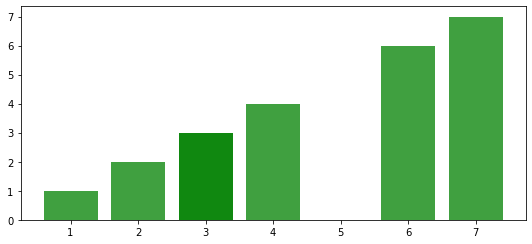

In [ ]:
import numpy as np
from matplotlib import animation as animation, pyplot as plt, cm

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()

data = [1, 4, 3, 2, 6, 7, 3]
colors = ['red', 'yellow', 'blue', 'green', 'black']
bars = plt.bar(data, data, facecolor='green', alpha=0.75)

def animate(frame):
   global bars
   index = np.random.randint(1, 7)
   bars[frame].set_height(index)
   bars[frame].set_facecolor(colors[np.random.randint(0, len(colors))])

ani = animation.FuncAnimation(fig, animate, frames=len(data))

plt.show()

In [ ]:
surface = atp.groupby(['Surface','Winner'])['Winner']\
             .count()\
             .reset_index(name='count') \
             .sort_values(['count'], ascending=False) 
        


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
top = surface.groupby('Surface').head(5)

top

,Surface,Winner,count
1033,Hard,Hewitt,108
1029,Hard,Henman,97
1057,Hard,Kafelnikov,90
1022,Hard,Haas,86
865,Hard,Agassi,85
259,Clay,Gaudio,69
334,Clay,Kuerten,69
383,Clay,Moya,68
364,Clay,Martin,63
204,Clay,Corretja,63


(0.0, 500.0)

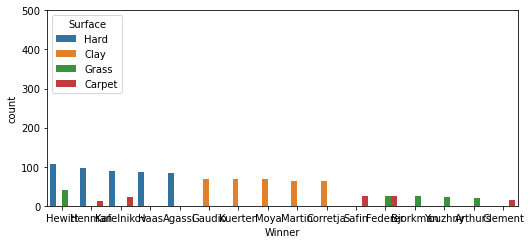

In [ ]:
sns.barplot(x="Winner", y ="count", hue = 'Surface', data=top)
plt.ylim(0, 500)

In [ ]:
features = atp
feat = pd.DataFrame(features)

In [ ]:
 from sklearn import preprocessing

# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array

tournament = feat['Tournament'].tolist()
features['Tournament'] = pd.get_dummies(tournament)

series = feat['Series'].tolist()
features['Series'] = pd.get_dummies(series)

surface = feat['Surface'].tolist()
features['Surface'] = pd.get_dummies(surface)

round = feat['Round'].tolist()
features['Round'] = pd.get_dummies(round)


loser = feat['Loser'].tolist()
features['Loser'] = pd.get_dummies(loser)

winner = feat['Winner'].tolist()
features['Winner'] = pd.get_dummies(winner)
# Remove the labels from the features

labels = features['Winner']
# axis 1 refers to the columns
features= features.drop(['Winner','Date'], axis = 1)

KeyError: 'Tournament'

In [ ]:
labels

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
46647    NaN
46648    NaN
46649    NaN
46650    NaN
46651    NaN
Name: Winner, Length: 46339, dtype: float64

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

ValueError: could not convert string to float: 'NR'

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.